In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv('data/sp500/SP500_training.csv')

train_df['Date'] = pd.to_datetime(train_df['Date'])

# Extract Year, Month and Day
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Day'] = train_df['Date'].dt.day

In [2]:
train_df.head()

,Ticker,Date,Low,Open,Volume,High,Close,Year,Month,Day
0,DTE,1970-01-02,18.297873,18.297873,7520.0,18.936171,18.936171,1970,1,2
1,KR,1970-01-02,0.878906,0.000000,128000.0,0.886719,0.882813,1970,1,2
2,GD,1970-01-02,0.703125,0.000000,232000.0,0.718750,0.718750,1970,1,2
3,JNJ,1970-01-02,1.218750,1.250000,1195200.0,1.253472,1.218750,1970,1,2
4,PG,1970-01-02,1.708984,1.710938,832000.0,1.722656,1.718750,1970,1,2


In [3]:
# Calculate the mean close price per month
monthly_mean = train_df.groupby([ 'Month'])['Close'].mean().reset_index()

# Calculate the mean close price per year
yearly_mean = train_df.groupby([ 'Year'])['Close'].mean().reset_index()

In [4]:
monthly_mean

,Month,Close
0,1,301.026157
1,2,307.499255
2,3,309.583922
3,4,311.847605
4,5,313.306519
5,6,309.030268
6,7,312.089887
7,8,314.851351
8,9,314.879600
9,10,302.681081


In [5]:
yearly_mean

,Year,Close
0,1970,5.000259
1,1971,5.704564
2,1972,5.630481
3,1973,4.949846
4,1974,3.801999
5,1975,4.070658
6,1976,4.882082
7,1977,4.860051
8,1978,4.625405
9,1979,4.614798


/Users/lucapetracca/anaconda3/envs/dmts/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucapetracca/anaconda3/envs/dmts/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucapetracca/anaconda3/envs/dmts/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lucapetracca/anaconda3/envs/dmts/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

TypeError: xticks() got multiple values for argument 'labels'

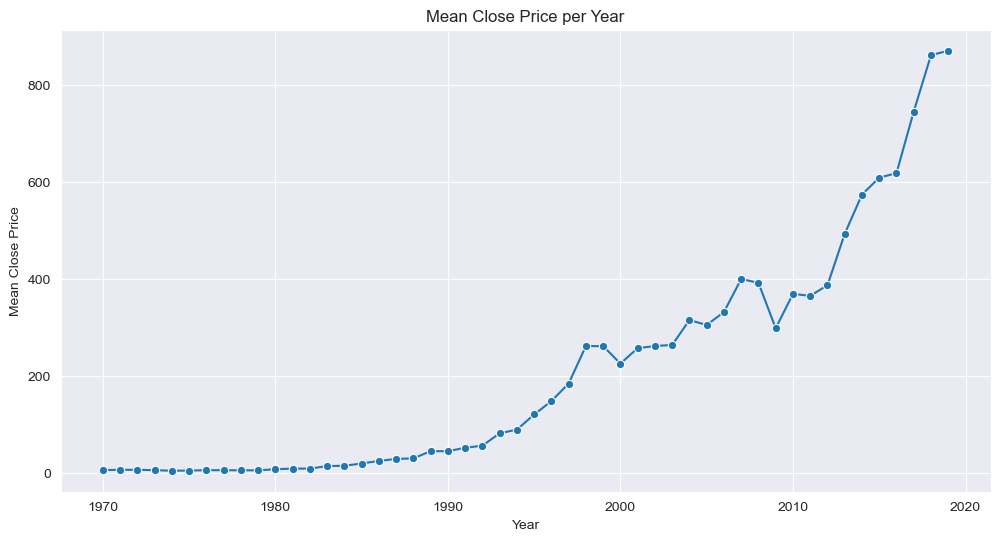

In [6]:
lst_year= yearly_mean['Year'].tolist()

# Using a line plot instead
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.lineplot(data=yearly_mean, x='Year', y='Close', marker='o')  # marker='o' adds dots at each data point

plt.title('Mean Close Price per Year')
plt.xlabel('Year')
plt.ylabel('Mean Close Price')

plt.xticks(0, len(lst_year), labels=lst_year, rotation=45)  # Plot every nth year
plt.grid(True)  # Adds a grid for better readability

plt.tight_layout()
plt.show()


In [ ]:
lst_month= monthly_mean['Month'].tolist()

# Using a line plot instead
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.lineplot(data=monthly_mean, x='Month', y='Close', marker='o')  # marker='o' adds dots at each data point

plt.title('Mean Close Price per Month')
plt.xlabel('Month')
plt.ylabel('Mean Close Price')

plt.xticks(0, len(lst_month), labels=lst_month)  # Plot every nth month
plt.grid(True)  # Adds a grid for better readability

plt.tight_layout()
plt.show()

### Identifying Seasonality with Fourier Transform

In [ ]:
'''# Fourier Transform
from numpy.fft import rfft
import numpy as np

# Choose a relevant column, for example, 'Close'
data = train_df['Close'].values

# Apply Fourier Transform
fourier_transform = rfft(data)

# Get frequencies
frequencies = np.fft.rfftfreq(len(data), d=1)  # d is the sample spacing
amplitudes = np.abs(fourier_transform)

In [ ]:
plt.figure(figsize=(14, 6))
plt.stem(frequencies, amplitudes)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform - Frequency Domain')
plt.show()

In [ ]:
from scipy.signal import find_peaks

# Find Peaks in the Amplitudes to Identify Significant Frequencies
peaks, _ = find_peaks(amplitudes, height=0)  # Adjust height as needed to filter out noise

# Extract Frequencies corresponding to the Peaks
significant_freqs = frequencies[peaks]
significant_amps = amplitudes[peaks]

# Optional - Plot the Frequencies and Amplitudes
plt.figure(figsize=(14, 6))
plt.stem(significant_freqs, significant_amps)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Significant Frequencies in the Fourier Transform')
plt.show()

# Convert Frequencies to Time Periods
significant_periods = 1 / significant_freqs

# Print the significant frequencies and their corresponding periods
for freq, period in zip(significant_freqs, significant_periods):
    print(f"Frequency: {freq}, Period: {period} (time units)")

In [ ]:
# Define Frequency Range for Filtering
# Example: Keeping frequencies between 0.01 and 0.5
min_freq = 0.000001
max_freq = 0.0001

# Filter out frequencies outside this range
filtered_indices = np.where((frequencies >= min_freq) & (frequencies <= max_freq))
filtered_freqs = frequencies[filtered_indices]
filtered_amps = amplitudes[filtered_indices]

# Find Peaks within the Filtered Frequencies
peaks, _ = find_peaks(filtered_amps, height=0)  # Adjust height as needed

# Extract Frequencies and Amplitudes of the Peaks
significant_freqs = filtered_freqs[peaks]
significant_amps = filtered_amps[peaks]

# Plot the Filtered Frequencies and Amplitudes
plt.figure(figsize=(14, 6))
plt.stem(significant_freqs, significant_amps)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Significant Frequencies within Filtered Range')
plt.show()

# Convert Frequencies to Time Periods
significant_periods = 1 / significant_freqs

# Print the significant frequencies and their corresponding periods
for freq, period in zip(significant_freqs, significant_periods):
    print(f"Frequency: {freq}, Period: {period} (time units)")

In [ ]:
# Convert Frequencies to Periods
significant_periods = 1 / significant_freqs

# Interpretation
for freq, period in zip(significant_freqs, significant_periods):
    # Approximate the period to the nearest integer for easier interpretation
    approx_period = round(period)

    if approx_period == 1:
        print(f"Frequency: {freq} - Pattern with period of {approx_period} days")'''

### Lag Features

In [ ]:
''''# Create a copy of the DataFrame
lag_df = train_df.copy()

# Now proceed with sorting and creating lag features
lag_df.sort_values(by=['Ticker', 'Date'], inplace=True)

# Assuming you want to create lag features for the 'Close' price
number_of_lags = 3 

for lag in range(1, number_of_lags + 1):
    lag_df[f'lag_{lag}'] = lag_df.groupby('Ticker')['Close'].shift(lag)

In [ ]:
lag_df.head()

In [ ]:
def fill_with_first_close(group):
    for lag in range(1, number_of_lags + 1):
        first_valid_index = group['Close'].first_valid_index()
        first_valid_value = group.loc[first_valid_index, 'Close'] if first_valid_index is not None else 0
        group[f'lag_{lag}'] = group[f'lag_{lag}'].fillna(first_valid_value)
    return group

lag_df_updated = lag_df.groupby('Ticker').apply(fill_with_first_close)

In [ ]:
lag_df_updated.head()

### Window Features

In [ ]:
# Window size of 20 trading days
window_size = 20

# Custom function to apply the incremental mean; important because otherwise first 19 days would have null values 
def incremental_mean(group):
    cumsum = group['Close'].cumsum()
    count = range(1, len(group) + 1)
    group['rolling_mean_monthly'] = cumsum / count
    return group

# Apply the incremental mean for the first 20 days for each ticker
lag_df_encoded = lag_df_encoded.groupby('Ticker_Encoded').apply(lambda x: incremental_mean(x.iloc[:window_size]))

lag_df_encoded.reset_index(drop=True, inplace=True)

# For the rest of the days, apply the normal rolling mean
lag_df_encoded['rolling_mean_monthly'] = lag_df_encoded.groupby('Ticker_Encoded')['Close'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

lag_df_encoded'''

### Ticket Encoding

In [9]:
import category_encoders as ce

df_encoded = train_df.copy()

def encode_ticker(df_encoded: pd.DataFrame) -> pd.DataFrame:
    encoder = ce.BinaryEncoder(cols=["Ticker"])
    df_binary_encoded = encoder.fit_transform(df_encoded["Ticker"])
    df_binary_encoded = df_binary_encoded.astype("Int8")
    df_encoded = df_encoded.join(df_binary_encoded)
    df_encoded.drop("Ticker", axis=1, inplace=True)
    return df_encoded

df_encoded = encode_ticker(df_encoded)
df_encoded

/Users/lucapetracca/anaconda3/envs/dmts/lib/python3.10/site-packages/category_encoders/utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
/Users/lucapetracca/anaconda3/envs/dmts/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Users/lucapetracca/anaconda3/envs/dmts/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Users/lucapetracca/anaconda3/envs/dmts/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype

,Date,Low,Open,Volume,High,Close,Year,Month,Day,Ticker_0,Ticker_1,Ticker_2,Ticker_3,Ticker_4,Ticker_5,Ticker_6,Ticker_7,Ticker_8
0,1970-01-02,18.297873,18.297873,7520.0,18.936171,18.936171,1970,1,2,0,0,0,0,0,0,0,0,1
1,1970-01-02,0.878906,0.000000,128000.0,0.886719,0.882813,1970,1,2,0,0,0,0,0,0,0,1,0
2,1970-01-02,0.703125,0.000000,232000.0,0.718750,0.718750,1970,1,2,0,0,0,0,0,0,0,1,1
3,1970-01-02,1.218750,1.250000,1195200.0,1.253472,1.218750,1970,1,2,0,0,0,0,0,0,1,0,0
4,1970-01-02,1.708984,1.710938,832000.0,1.722656,1.718750,1970,1,2,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916661,2019-10-08,36.470001,36.529999,2139300.0,37.060001,36.619999,2019,10,8,0,0,1,1,1,1,0,1,1
2916662,2019-10-08,255.100006,259.359985,258200.0,263.709991,260.480011,2019,10,8,0,0,1,0,1,0,0,0,0
2916663,2019-10-08,33.709999,34.310001,10686900.0,34.470001,33.880001,2019,10,8,1,0,1,1,0,0,1,1,0
2916664,2019-10-08,169.513336,174.083328,1554900.0,174.733337,169.666672,2019,10,8,1,0,0,1,0,0,1,0,0


### Seasonality Index


In [12]:
from sklearn.preprocessing import OneHotEncoder

df = df_encoded.copy()

def categorize_month(month):
    if month in [4, 5, 7, 8, 9]:
        return "Bullish"
    elif month in [1, 10, 11, 12]:
        return "Bearish"
    else:
        return "Normal"

df["Month_Category"] = df["Month"].apply(categorize_month)

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[["Month_Category"]]).toarray()

encoded_df = pd.DataFrame(
    encoded_data, columns=encoder.get_feature_names_out(["Month_Category"])
).astype("Int8")

df_final = pd.concat([df, encoded_df], axis=1)
df_final.drop(["Month_Category"], axis=1, inplace=True)
df_final.head(10)

,Date,Low,Open,Volume,High,Close,Year,Month,Day,Ticker_0,...,Ticker_2,Ticker_3,Ticker_4,Ticker_5,Ticker_6,Ticker_7,Ticker_8,Month_Category_Bearish,Month_Category_Bullish,Month_Category_Normal
0,1970-01-02,18.297873,18.297873,7520.0,18.936171,18.936171,1970,1,2,0,...,0,0,0,0,0,0,1,1,0,0
1,1970-01-02,0.878906,0.000000,128000.0,0.886719,0.882813,1970,1,2,0,...,0,0,0,0,0,1,0,1,0,0
2,1970-01-02,0.703125,0.000000,232000.0,0.718750,0.718750,1970,1,2,0,...,0,0,0,0,0,1,1,1,0,0
3,1970-01-02,1.218750,1.250000,1195200.0,1.253472,1.218750,1970,1,2,0,...,0,0,0,0,1,0,0,1,0,0
4,1970-01-02,1.708984,1.710938,832000.0,1.722656,1.718750,1970,1,2,0,...,0,0,0,0,1,0,1,1,0,0
5,1970-01-02,6.843750,6.851563,72000.0,6.890625,6.851563,1970,1,2,0,...,0,0,0,0,1,1,0,1,0,0
6,1970-01-02,0.353909,0.353909,2830950.0,0.364198,0.364198,1970,1,2,0,...,0,0,0,0,1,1,1,1,0,0
7,1970-01-02,0.683357,0.688495,1109377.0,0.689779,0.683357,1970,1,2,0,...,0,0,0,1,0,0,0,1,0,0
8,1970-01-02,3.447917,3.541667,276000.0,3.541667,3.458333,1970,1,2,0,...,0,0,0,1,0,0,1,1,0,0
9,1970-01-02,0.925926,0.925926,634838.0,0.979424,0.979424,1970,1,2,0,...,0,0,0,1,0,1,0,1,0,0


In [ ]:
#df_one_hot.sort_values(by="Date", inplace=True)
#df_one_hot.reset_index(drop=True)
#df_one_hot

In [14]:
df_final.head(10).to_csv('data/sp500/SP500_training_encoded.csv', index=False)